In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import ast
import missingno as msno 
import seaborn as sns
sns.set()

In [5]:
ml_data = pd.read_csv("datasets/movies_clean.csv")

In [6]:
ml_data.shape

(45376, 19)

In [7]:
ml_data.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,12.451801
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035


In [8]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  float64
 2   genres                 42992 non-null  object 
 3   id                     45376 non-null  int64  
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  float64
 7   production_companies   33580 non-null  object 
 8   production_countries   39165 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       41608 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [9]:
#cambiamos a formato datetime la columna release_date
fechas_datetime = pd.to_datetime(ml_data["release_date"], format='%Y-%m-%d', errors = 'coerce') 


#### Obsevamos los valores nulos

<function matplotlib.pyplot.show(close=None, block=None)>

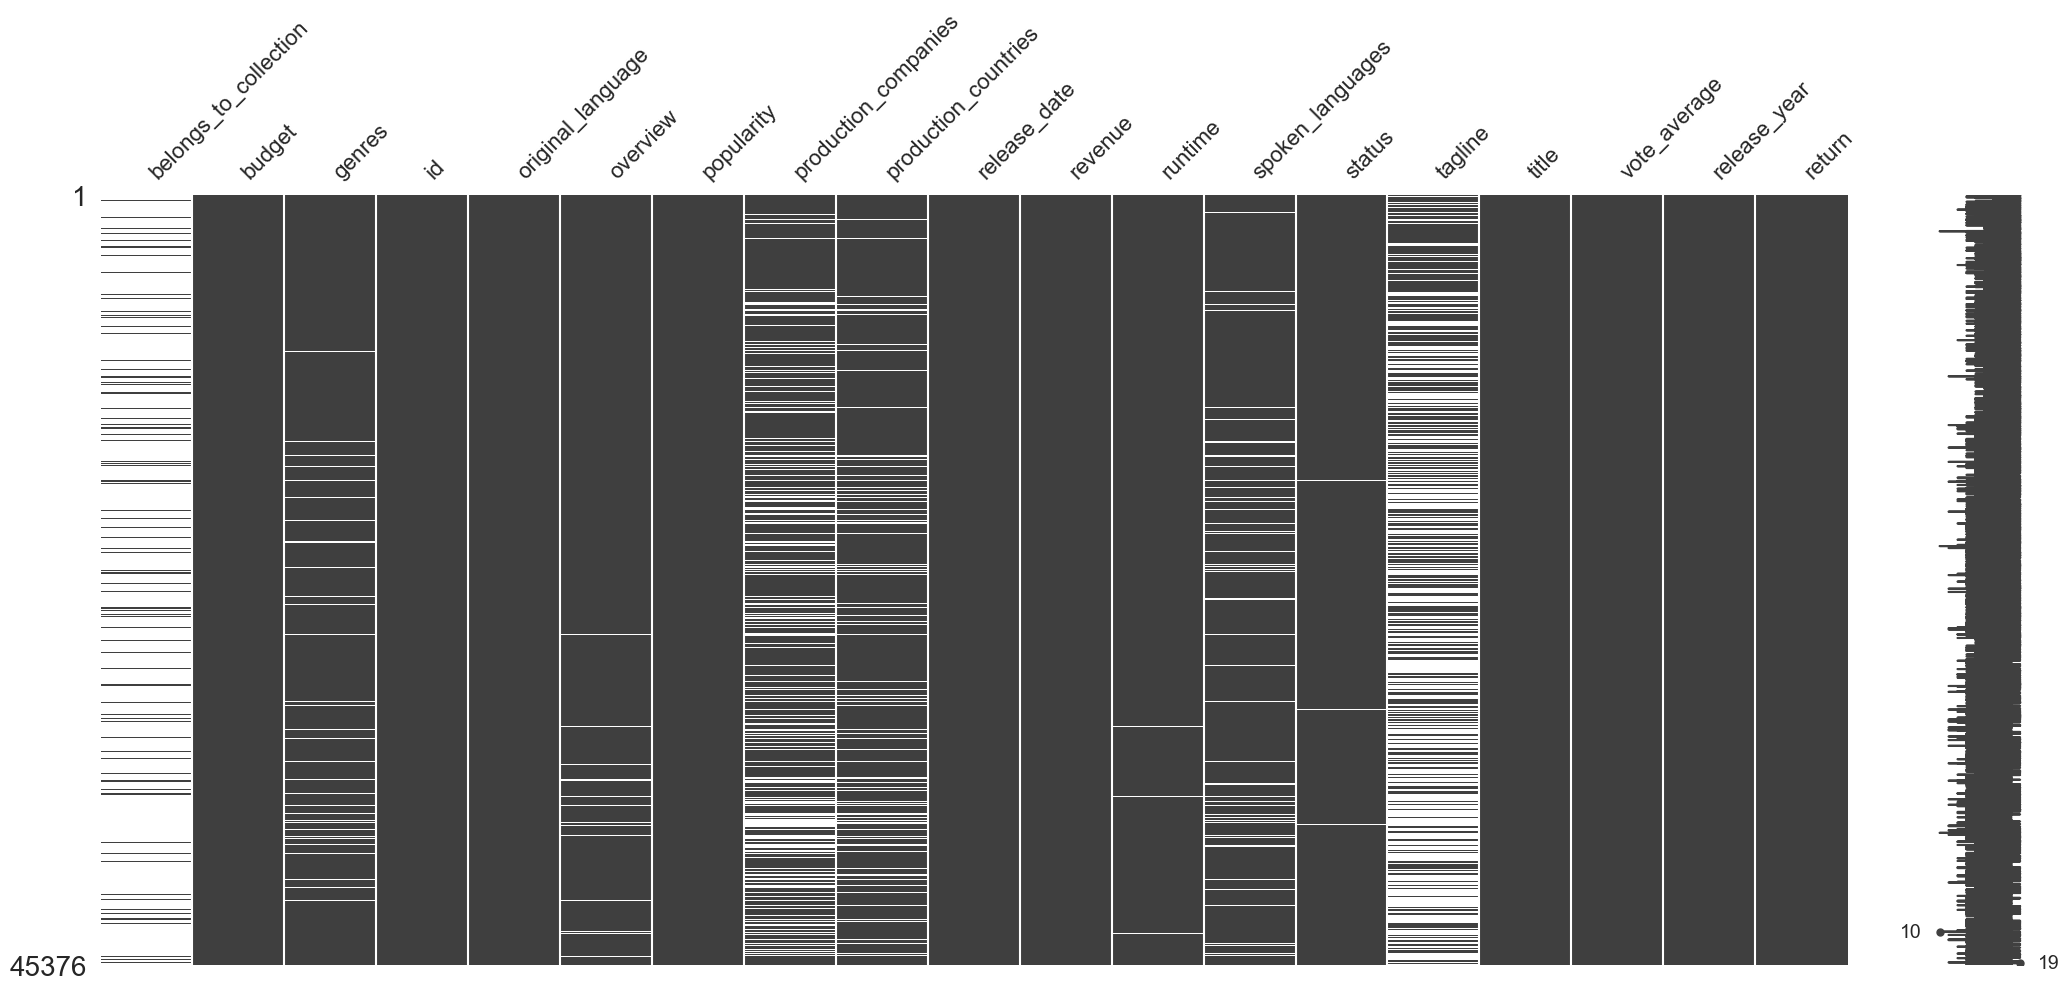

In [10]:
msno.matrix(ml_data)
plt.show

#### Observamos la cantidad de peliculas producidas por año

Text(0.5, 0, 'Year')

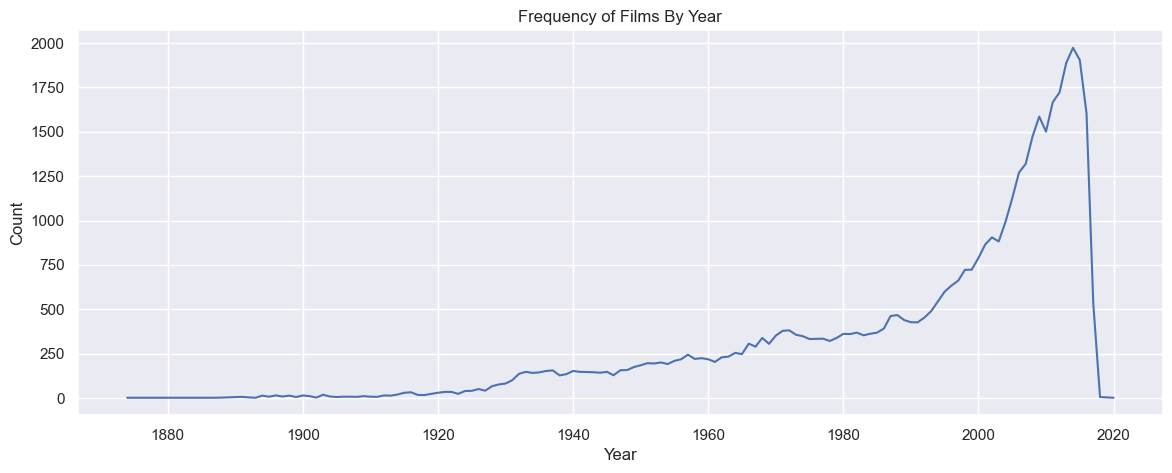

In [11]:
count_by_year = ml_data.groupby("release_year")["title"].count()
plt.figure(figsize = (14, 5))
count_by_year.plot()
plt.title("Frequency of Films By Year")
plt.ylabel("Count")
plt.xlabel("Year")

#### Analizamos los idiomas

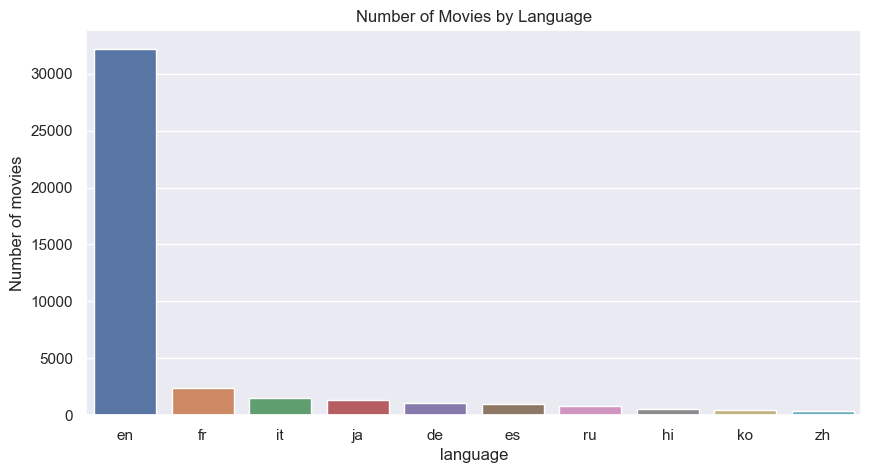

In [12]:
num_lang = pd.DataFrame(ml_data["original_language"].value_counts())
num_lang.columns = ["Number of movies"]
num_lang["language"] = num_lang.index
plt.figure(figsize= (10, 5))
sns.barplot(x = "language", y = "Number of movies", data = num_lang.iloc[0:10])
plt.title("Number of Movies by Language")
plt.show()

#### Nubes de palabras

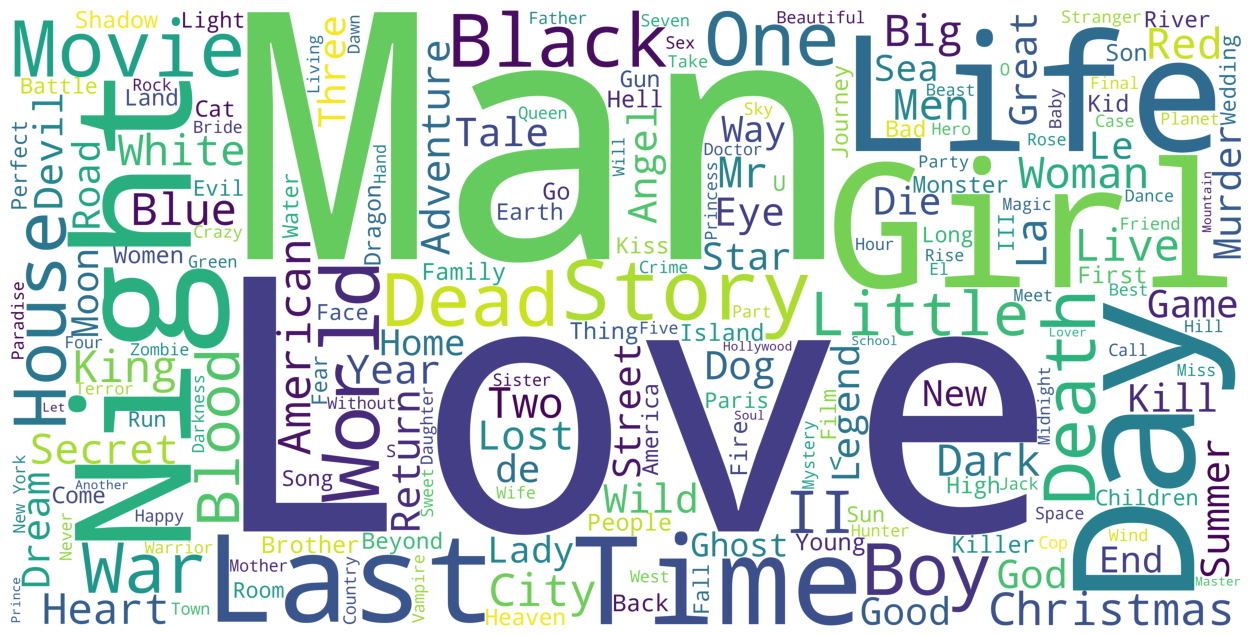

In [13]:
#para títulos
ml_data["title"] = ml_data["title"].astype(str) 
ml_data["overview"] = ml_data["overview"].astype(str)
title_words = ' '.join(ml_data["title"])
overview_words = ' '.join(ml_data["overview"])
title_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height = 2000, width = 4000).generate(title_words)
plt.figure(figsize = (16, 8))
plt.imshow(title_cloud)
plt.axis("off")
plt.show()

C:\Users\CARRILLO JARA\AppData\Local\Temp\ipykernel_12700\1522704743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ml_data["vote_average"])


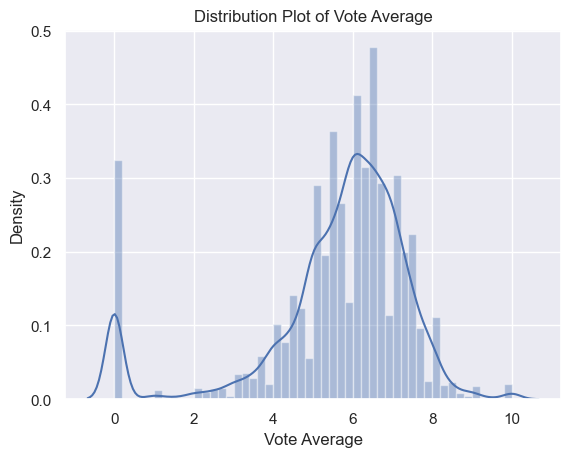

In [14]:
sns.distplot(ml_data["vote_average"])
plt.title("Distribution Plot of Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Density")
plt.show()